# Basketball Rankings

In this lab we will be analyzing data on every basketball player in history to see how basketball statistics trend and to see whether players are getting better or worse over time. This is a data set listing basketball statistics for every basketball player in NBA history, players stats include their offense rating, defense rating, their total rating, their possessions, and their season. 

The ratings can be interpreted as each number meaning an increase in overall team performance per 100 possessions. For example if a player has an raptor_offense rating of +1, that means the player improves the team's overall performance by 1 per 100 posssessions that player has. The data comes from play by play stastics gathered by FiveThirtyEight.

We will be asking:
1. What the count, mean, min, and max are for the data?
2. What the range of the data is?
3. What the columns are?
4. What the count for each of the columns are?
5. Who were the top 30 players in consideration to possessions per season.
6. Do graphs show whether players have been getting better or worse over time?
7. What is the mean offensive rating for the 10 worst offensive players?
8. What is the mean offensive rating for the 10 best offensive players?
9. What is the mean number of possessions per season for the 10 worst offensive players?
10. What is the mean number of possessions per season for the 10 best offensive players?
11. What is the mean defensive rating for the 10 worst defensive players?
12. What is the mean defensive rating for the 10 best defensive players?
13. What is the mean number of possessions per season for the 10 worst defensive players?
14. What is the mean number of possessions per season for the 10 best defensive players?

## Data Set Preparation

My dataset came from FiveThirtyEight and can be found here: https://github.com/fivethirtyeight/data/tree/master/nba-raptor

It has stastics and ratings for every single basketball player over the course of their career.

In [ ]:
# Import all the modules I want to use in this homework 
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Allowing my notebook to access my datases using the pandas library.

In [2]:
# here I read in the csv file so that my notebook sees my data
df3 = pd.read_csv('Basketball.csv')

Creating a new column of data called poss_column which stores all of the number of possessions for every player.

In [3]:
highlightP_column = "poss"
poss_column = df3[highlightP_column]

Creating a new column of data called def_column which stores all raptor_defense ratings for every player.

In [4]:
highlightD_column = "raptor_defense"
def_column = df3[highlightD_column]

Creating a new column of data called off_column which stores all raptor_offense ratings for every player.

In [5]:
highlightO_column = "raptor_offense"
off_column = df3[highlightO_column]

Creating a new column of data called seas_column which stores all the seasons.

In [6]:
highlightS_column = "season"
seas_column = df3[highlightS_column]

## Data Modeling

In my data modeling section, my goal is to find the best and worst players in each of the main statistical columns: possessions, raptor_offense, and raptor_defense. Then, I plan to find out whether players are getting better or worse over time through graphs. The strengths of this dataset include many points of data, standard numerical values both in float and integer form, and being easily accessible. The ease of accessibility is important because datasets should be able to be accessed for at least 10 years, the integer and float values are useful for numerical  analysis which is supported by the large number of data entries. The weaknesses of this dataset include being confusingly organized, having little context, and being based off of another dataset I do not have access to. Being confusingly organized is an issue as it is sometimes hard to interpret, this is made worse by the lack of useful context and when the initial dataset is not shared it is difficult to then retrace their steps. It's more useful to be able to see how they calculated their RAPTOR ratings and then be able to calculate them ourselves.

Displaying the first 3 rows of the data to confirm it has been modeled correctly, it has been.

In [7]:
df3.head(3)

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266


### Basic Statistic Analysis

Describing the data using the pandas program which finds the count, mean, standard deviation, min, max and quartile range.

In [8]:
df3.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000,17483.000000
mean,2000.077447,2807.329463,1393.568724,-1.273063,-0.336920,-1.609983,2.022395,1.831988,0.190408,-1.286782,-0.521658,-1.808439,0.206465
std,12.100604,2051.525578,1013.637350,3.413769,2.224318,4.303641,3.514858,3.128180,0.589308,3.169066,2.151774,4.287456,0.797505
min,1977.000000,1.000000,0.000000,-82.192072,-43.212808,-103.084801,-7.382978,-7.382978,-1.376520,-71.510086,-31.747427,-101.442650,-6.892146
25%,1990.000000,927.000000,461.000000,-2.837061,-1.391519,-3.577104,-0.117196,-0.117098,0.000000,-2.880051,-1.598517,-3.989398,-0.226096
50%,2001.000000,2617.000000,1302.000000,-1.117461,-0.418229,-1.389780,0.603388,0.574556,0.000000,-1.200995,-0.536999,-1.645742,0.100898
75%,2011.000000,4421.500000,2191.000000,0.550733,0.657634,0.699653,3.182721,2.966438,0.077411,0.466392,0.589110,0.658301,0.524438
max,2019.000000,9271.000000,4270.000000,53.228864,62.469205,72.622361,28.762877,24.355978,7.006934,42.890281,42.989063,49.106166,23.732063


Finding the index information for the data.

In [9]:
df3.index

RangeIndex(start=0, stop=17483, step=1)

Finding the types and names of each of the columns. 

In [10]:
df3.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'war_playoffs', 'predator_offense', 'predator_defense',
       'predator_total', 'pace_impact'],
      dtype='object')

Getting information on the completeness of the dataset to see if my dataset is missing any data.

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17483 entries, 0 to 17482
Data columns (total 15 columns):
player_name         17483 non-null object
player_id           17483 non-null object
season              17483 non-null int64
poss                17483 non-null int64
mp                  17483 non-null int64
raptor_offense      17483 non-null float64
raptor_defense      17483 non-null float64
raptor_total        17483 non-null float64
war_total           17483 non-null float64
war_reg_season      17483 non-null float64
war_playoffs        17483 non-null float64
predator_offense    17483 non-null float64
predator_defense    17483 non-null float64
predator_total      17483 non-null float64
pace_impact         17483 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 2.0+ MB


Grouping the players by their names.

In [37]:
gDD = df3.groupby(['player_name']) 

### Group By Function

Displaying every Player's first season

In [29]:
gDD.first()

,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
player_name,,,,,,,,,,,,,,
A.C. Green,greenac01,1986,3560,1648,-1.870606,0.275278,-1.595328,0.958032,1.212784,-0.254753,-1.682288,0.195699,-1.486589,0.389033
A.J. Bramlett,bramlaj01,2000,123,61,-8.360250,-1.460235,-9.820485,-0.221281,-0.221281,0.000000,-7.899853,-1.093612,-8.993465,0.527413
A.J. English,engliaj01,1991,2965,1443,-1.873034,-2.536594,-4.409627,-1.221742,-1.221742,0.000000,-2.310419,-2.816877,-5.127296,-0.008613
A.J. Guyton,guytoaj01,2001,1186,630,-1.194590,-2.568714,-3.763304,-0.324015,-0.324015,0.000000,-1.675223,-3.332272,-5.007495,-0.478357
A.J. Wynder,wyndeaj01,1991,81,39,-5.176970,-3.230910,-8.407881,-0.111936,-0.111936,0.000000,-5.137439,-4.861552,-9.998992,-0.566521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhaire Smith,smithzh01,2019,252,116,0.950911,-0.581179,0.369732,0.175101,0.113419,0.061682,0.528382,-1.348548,-0.820165,0.227708
Zhou Qi,qizh01,2018,276,130,-11.021556,1.803056,-9.218500,-0.435854,-0.376247,-0.059606,-8.504682,-0.352144,-8.856826,0.754303
Zoran Dragic,dragizo01,2015,157,75,-4.015397,-7.683438,-11.698834,-0.345806,-0.345806,0.000000,-1.799401,-8.791594,-10.590995,0.953373


Displaying every player's last season.

In [31]:
gDD.last()

,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
player_name,,,,,,,,,,,,,,
A.C. Green,greenac01,2001,2630,1432,-2.614550,1.360417,-1.254133,1.089576,1.054258,0.035318,-3.016787,0.285908,-2.730880,-0.339226
A.J. Bramlett,bramlaj01,2000,123,61,-8.360250,-1.460235,-9.820485,-0.221281,-0.221281,0.000000,-7.899853,-1.093612,-8.993465,0.527413
A.J. English,engliaj01,1992,3428,1665,-1.798131,-2.571572,-4.369703,-1.376078,-1.376078,0.000000,-2.182728,-2.607700,-4.790428,0.011897
A.J. Guyton,guytoaj01,2003,18,9,-10.979796,0.355305,-10.624491,-0.036385,-0.036385,0.000000,-8.980101,-1.185250,-10.165351,0.579115
A.J. Wynder,wyndeaj01,1991,81,39,-5.176970,-3.230910,-8.407881,-0.111936,-0.111936,0.000000,-5.137439,-4.861552,-9.998992,-0.566521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhaire Smith,smithzh01,2019,252,116,0.950911,-0.581179,0.369732,0.175101,0.113419,0.061682,0.528382,-1.348548,-0.820165,0.227708
Zhou Qi,qizh01,2019,3,1,2.643663,-8.453841,-5.810177,-0.001545,-0.001545,0.000000,2.240807,-10.209123,-7.968316,-1.091692
Zoran Dragic,dragizo01,2015,157,75,-4.015397,-7.683438,-11.698834,-0.345806,-0.345806,0.000000,-1.799401,-8.791594,-10.590995,0.953373


### Rankings

Sorting all of the players in the NBA by their number of possessions in a season so that the players with the most possessions show up first.

In [34]:
# sort the data frame by west column, in ascending order
sorted_df = df3.sort_values(by=highlightP_column, ascending=False)
#displaying the first 10 values 
sorted_df[:30]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
6728,Elvin Hayes,hayesel01,1978,9271,4114,0.349730,1.777778,2.127508,10.367569,7.039687,3.327882,0.860254,1.986030,2.846284,-0.271959
9791,Dan Majerle,majerda01,1993,8822,4270,3.268043,0.551937,3.819980,14.351234,11.049459,3.301775,3.479047,1.069759,4.548806,-0.241460
9847,Moses Malone,malonmo01,1981,8752,4200,2.455410,0.793387,3.248797,12.801247,10.188951,2.612296,2.995958,0.755554,3.751512,-0.848373
6729,Elvin Hayes,hayesel01,1979,8604,3891,0.617144,1.672968,2.290112,10.041268,7.949405,2.091862,1.248934,1.772225,3.021158,-0.305213
1387,Larry Bird,birdla01,1985,8513,3976,5.419678,1.909035,7.328713,20.427527,17.065186,3.362341,5.689489,1.672114,7.361603,-0.608163
11549,Norm Nixon,nixonno01,1980,8473,3874,1.557904,-0.424351,1.133553,7.720182,6.088707,1.631475,1.772127,0.227180,1.999307,-0.151741
16553,Jo Jo White,whitejo01,1977,8442,3728,0.105522,0.446906,0.552428,6.275147,5.511627,0.763520,0.150342,0.831946,0.982288,-0.509447
11771,Hakeem Olajuwon,olajuha01,1994,8434,4266,0.752528,5.317178,6.069705,19.275229,14.340241,4.934989,1.281960,4.896824,6.178784,-0.436426
4827,Julius Erving,ervinju01,1977,8424,3698,3.025064,1.855868,4.880932,14.481349,10.813960,3.667389,3.125669,1.628764,4.754434,-0.230015
1383,Larry Bird,birdla01,1981,8394,3989,2.106509,2.458084,4.564592,15.002519,11.159807,3.842712,2.894413,2.487401,5.381814,-0.310815


Sorting all of the players in the NBA by their number of possessions in a season so that the players with the most possessions show up first.

In [35]:
# sort the data frame by west column, in ascending order
sorted_df = df3.sort_values(by=highlightP_column, ascending=True)
#displaying the first 10 values 
sorted_df[:30]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
7722,Damion James,jamesda01,2013,1,0,-4.206272,1.057768,-3.148504,0.000000,0.000000,0.000000,-5.700446,0.941358,-4.759088,-1.378120
13856,Alex Scales,scaleal01,2006,1,0,-3.657020,-1.465248,-5.122268,0.000000,0.000000,0.000000,-5.226045,-3.965641,-9.191686,-1.511781
3566,JamesOn Curry,curryja01,2010,1,0,-6.571634,-4.250245,-10.821879,0.000000,0.000000,0.000000,-7.928384,-6.209344,-14.137728,-1.404681
7228,Danuel House Jr.,houseda01,2017,2,1,-19.338722,17.461880,-1.876843,0.000424,0.000424,0.000000,-17.603950,7.380937,-10.223013,-4.633567
3888,Tyler Davis,davisty01,2019,2,1,-40.825921,61.113882,20.287961,0.011423,0.011423,0.000000,-26.935305,42.989063,16.053758,-2.873834
1307,Del Beshore,beshode01,1979,2,1,-5.321577,-4.050463,-9.372041,-0.003340,-0.003340,0.000000,-6.509114,-5.518046,-12.027161,-1.225503
12046,Andy Panko,pankoan01,2001,2,1,-3.073442,-1.807728,-4.881170,-0.001071,-0.001071,0.000000,-4.822508,-4.575325,-9.397833,-1.422325
7118,John Holland,hollajo02,2019,2,1,-15.746631,15.992448,0.245816,0.001434,0.001434,0.000000,-10.634510,5.053319,-5.581191,-6.319818
7116,John Holland,hollajo02,2016,2,1,-45.323308,-14.967987,-60.291296,-0.031378,0.000000,-0.031378,-20.030093,-13.275457,-33.305550,3.453689
11488,Chuck Nevitt,nevitch01,1994,2,1,-4.390342,-19.496001,-23.886342,-0.013443,-0.013443,0.000000,4.206255,-15.749438,-11.543183,23.732063


Sorting the players by the their offensive rating in a descending order so that it shows the best players first.

In [43]:
# sort the data frame by west column, in ascending order
sorted2_df = df3.sort_values(by=highlightO_column, ascending=False)
#displaying the first 10 values 
sorted2_df[:10]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
9392,DeAndre Liggins,liggide01,2014,3,1,53.228864,-28.548543,24.680321,0.014008,0.014008,0.0,42.890281,-22.273383,20.616897,0.090756
10896,Naz Mitrou-Long,mitrona01,2018,3,1,53.033254,19.589106,72.622361,0.040787,0.040787,0.0,40.169967,8.936199,49.106166,6.014441
9470,Ian Lockhart,lockhia01,1991,4,2,38.203497,-3.406537,34.796960,0.037292,0.037292,0.0,33.504131,-5.329212,28.174918,-2.641788
16509,Tyson Wheeler,wheelty01,1999,6,3,35.634016,-5.394447,30.239569,0.050126,0.050126,0.0,32.053844,-2.787478,29.266367,-0.656393
7030,Steven Hill,hillst01,2009,4,2,33.082161,-0.398375,32.683786,0.033471,0.033471,0.0,29.766725,-2.598152,27.168573,-6.892146
5386,Chad Gallagher,gallach01,1994,6,3,32.245810,-3.283771,28.962038,0.052118,0.052118,0.0,28.370510,2.807557,31.178067,7.097254
889,Steve Bardo,bardost01,1992,2,1,23.143178,-3.868893,19.274285,0.010470,0.010470,0.0,20.285423,-5.680503,14.604920,-6.672336
9348,Cedric Lewis,lewisce01,1996,8,4,22.267324,15.509600,37.776924,0.080680,0.080680,0.0,22.617259,13.946711,36.563969,-2.277619
10566,Cozell McQueen,mcqueco01,1987,15,7,21.521709,6.025878,27.547587,0.105719,0.105719,0.0,19.257861,4.070470,23.328331,-2.344185
592,Darrell Armstrong,armstda01,1995,16,8,21.443130,3.282938,24.726069,0.118804,0.118804,0.0,23.116716,5.782660,28.899375,5.583071


Creating a data frame of only the best 10 offensive players and then finding the statistical description of that data.

In [44]:
test = sorted2_df[:10]
test.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,1999.500000,6.700000,3.200000,33.380294,-0.049304,33.330990,0.054347,0.054347,0.0,29.203272,-0.312513,28.890758,-0.269894
std,10.490737,4.967673,2.485514,12.116754,13.135953,14.812563,0.036474,0.036474,0.0,8.124706,10.014282,9.308746,5.023383
min,1987.000000,2.000000,1.000000,21.443130,-28.548543,19.274285,0.010470,0.010470,0.0,19.257861,-22.273383,14.604920,-6.892146
25%,1992.500000,3.250000,1.250000,22.486288,-3.753304,25.431448,0.034427,0.034427,0.0,22.742123,-4.693779,24.288391,-2.567388
50%,1995.500000,5.000000,2.500000,32.663985,-1.841073,29.600803,0.045456,0.045456,0.0,29.068617,0.104702,28.537147,-1.467006
75%,2006.500000,7.500000,3.750000,37.561127,5.340143,34.268667,0.073540,0.073540,0.0,33.141559,5.354612,30.700142,4.209993
max,2018.000000,16.000000,8.000000,53.228864,19.589106,72.622361,0.118804,0.118804,0.0,42.890281,13.946711,49.106166,7.097254


Sorting the players by their offensive rating in an ascending order so that it shows the players with the worst offensive rating first.

In [45]:
# sort the data frame by west column, in ascending order
sorted2_df = df3.sort_values(by=highlightO_column, ascending=True)
#displaying the first 10 values 
sorted2_df[:10]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
11200,Gheorghe Muresan,muresgh01,1999,2,1,-82.192072,-20.892729,-103.084801,-0.053045,-0.053045,0.000000,-71.510086,-29.932564,-101.442650,3.259603
7116,John Holland,hollajo02,2016,2,1,-45.323308,-14.967987,-60.291296,-0.031378,0.000000,-0.031378,-20.030093,-13.275457,-33.305550,3.453689
8998,Mindaugas Kuzminskas,kuzmimi01,2018,5,2,-44.303863,11.726602,-32.577261,-0.030256,-0.030256,0.000000,-29.342671,-0.822352,-30.165023,-0.584403
808,LaMark Baker,bakerla01,1999,4,2,-43.263751,-13.227863,-56.491613,-0.055372,-0.055372,0.000000,-38.768411,-18.237317,-57.005728,0.876471
3888,Tyler Davis,davisty01,2019,2,1,-40.825921,61.113882,20.287961,0.011423,0.011423,0.000000,-26.935305,42.989063,16.053758,-2.873834
1690,Chris Boucher,bouchch01,2018,2,1,-40.160323,-4.628783,-44.789106,-0.021557,-0.021557,0.000000,-14.170343,-7.132532,-21.302874,0.500312
14965,Barry Sumpter,sumptba01,1989,2,1,-35.681921,-4.626960,-40.308881,-0.018925,-0.018925,0.000000,-32.624682,-6.219977,-38.844659,-1.261668
2846,Mike Champion,champmi01,1989,8,4,-34.358070,-8.538297,-42.896367,-0.088996,-0.088996,0.000000,-30.193367,-5.724301,-35.917668,8.787783
6958,Nene,hilarne01,2006,6,3,-34.043722,-7.144630,-41.188352,-0.062605,-0.062605,0.000000,-30.181577,-12.257897,-42.439474,5.873137
7494,Mile Ilic,ilicmi01,2007,12,6,-33.131318,-4.794304,-37.925622,-0.111176,-0.111176,0.000000,-29.561569,-10.162843,-39.724412,3.020696


Creating a data frame of only the worst 10 offensive players and then finding the statistical description of that data.

In [39]:
test = sorted2_df[:10]
test.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2006.000000,4.500000,2.200000,-43.328427,-0.598107,-43.926534,-0.046189,-0.043051,-0.003138,-32.331810,-6.077618,-38.409428,2.105179
std,11.709445,3.374743,1.686548,14.378768,23.319361,30.250979,0.035899,0.038607,0.009923,15.320835,19.032211,29.242797,3.500626
min,1989.000000,2.000000,1.000000,-82.192072,-20.892729,-103.084801,-0.111176,-0.111176,-0.031378,-71.510086,-29.932564,-101.442650,-2.873834
25%,1999.000000,2.000000,1.000000,-44.043835,-12.055471,-53.565986,-0.060797,-0.060797,0.000000,-32.016853,-13.021067,-41.760708,-0.313224
50%,2006.500000,3.000000,1.500000,-40.493122,-5.969467,-42.042359,-0.042211,-0.041651,0.000000,-29.871573,-8.647688,-37.381163,1.948584
75%,2017.500000,5.750000,2.750000,-34.689033,-4.627416,-38.521437,-0.023732,-0.019583,0.000000,-27.537147,-5.848220,-30.950155,3.405168
max,2019.000000,12.000000,6.000000,-33.131318,61.113882,20.287961,0.011423,0.011423,0.000000,-14.170343,42.989063,16.053758,8.787783


Sorting the players by the their defensive rating in a descending order so that it shows the best players first.

In [48]:
# sort the data frame by west column, in ascending order
sorted3_df = df3.sort_values(by=highlightD_column, ascending=False)
#displaying the first 10 values 
sorted3_df[:10]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
15736,Tyler Ulis,ulisty01,2019,2,1,-16.801473,62.469205,45.667732,0.023868,0.023868,0.0,-15.001847,41.704602,26.702755,-3.443889
3888,Tyler Davis,davisty01,2019,2,1,-40.825921,61.113882,20.287961,0.011423,0.011423,0.0,-26.935305,42.989063,16.053758,-2.873834
7946,Brice Johnson,johnsbr02,2017,20,9,-8.129280,27.909117,19.779837,0.100007,0.100007,0.0,-7.566365,24.978731,17.412366,-3.267275
10228,Tahjere McCall,mccalta01,2019,20,8,-2.355725,25.294940,22.939215,0.108008,0.108008,0.0,-5.400626,20.122540,14.721914,3.066439
1698,Bruce Bowen,bowenbr01,1997,2,1,-6.051458,24.814355,18.762897,0.010258,0.010258,0.0,-7.493667,14.787087,7.293420,-5.965230
491,Kostas Antetokounmpo,antetko01,2019,23,11,-14.312780,24.443225,10.130446,0.073167,0.073167,0.0,-11.637202,17.837946,6.200744,1.240220
3578,Seth Curry,curryse01,2014,27,13,-1.755294,21.373347,19.618053,0.148028,0.148028,0.0,-0.711300,17.087726,16.376426,0.219493
14206,Kobi Simmons,simmoko01,2019,4,2,-10.097434,20.123010,10.025576,0.012635,0.012635,0.0,-9.742481,15.095251,5.352770,-3.134801
10896,Naz Mitrou-Long,mitrona01,2018,3,1,53.033254,19.589106,72.622361,0.040787,0.040787,0.0,40.169967,8.936199,49.106166,6.014441
4273,PJ Dozier,doziepj01,2018,6,3,-27.209297,19.294134,-7.915163,-0.007940,-0.007940,0.0,-21.911472,20.581080,-1.330393,0.432694


Creating a data frame of only the best 10 defensive players and then finding the statistical description of that data.

In [49]:
test2 = sorted3_df[:10]
test2.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,2015.900000,10.900000,5.000000,-7.450541,30.642432,23.191891,0.052024,0.052024,0.0,-6.623030,22.412022,15.788993,-0.771174
std,6.822349,10.235559,4.737557,24.415299,16.658165,21.890292,0.052238,0.052238,0.0,18.193643,11.320302,14.139899,3.614912
min,1997.000000,2.000000,1.000000,-40.825921,19.294134,-7.915163,-0.007940,-0.007940,0.0,-26.935305,8.936199,-1.330393,-5.965230
25%,2017.250000,2.250000,1.000000,-16.179300,20.435594,12.288558,0.011726,0.011726,0.0,-14.160686,15.593370,6.473913,-3.234157
50%,2018.500000,5.000000,2.500000,-9.113357,24.628790,19.698945,0.032327,0.032327,0.0,-8.654423,18.980243,15.387836,-1.327170
75%,2019.000000,20.000000,8.750000,-3.279658,27.255573,22.276402,0.093297,0.093297,0.0,-5.923886,23.879318,17.153381,1.038338
max,2019.000000,27.000000,13.000000,53.033254,62.469205,72.622361,0.148028,0.148028,0.0,40.169967,42.989063,49.106166,6.014441


Sorting the players by their offensive rating in an ascending order so that it shows the players with the worst offensive rating first.

In [50]:
# sort the data frame by west column, in ascending order
sorted3_df = df3.sort_values(by=highlightD_column, ascending=True)
#displaying the first 10 values 
sorted3_df[:10]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
14330,Chris Smith,smithch05,2014,5,2,-10.379112,-43.212808,-53.591920,-0.052849,-0.052849,0.0,-7.602391,-31.747427,-39.349817,1.794057
2988,Rakeem Christmas,chrisra01,2016,13,6,9.431762,-38.107211,-28.675450,-0.079736,-0.079736,0.0,6.326726,-30.253953,-23.927227,0.459634
478,Ike Anigbogu,anigbik01,2019,14,6,-22.448814,-30.159119,-52.607933,-0.156443,-0.156443,0.0,-13.647046,-22.590683,-36.237729,2.549590
9392,DeAndre Liggins,liggide01,2014,3,1,53.228864,-28.548543,24.680321,0.014008,0.014008,0.0,42.890281,-22.273383,20.616897,0.090756
14146,Jordan Sibert,siberjo01,2019,9,4,12.921444,-26.343860,-13.422416,-0.021604,-0.021604,0.0,7.288803,-20.759358,-13.470555,-0.824158
6546,Joe Harris,harrijo01,2016,33,15,-3.481343,-25.045479,-28.526822,-0.201459,-0.201459,0.0,-2.598065,-17.846889,-20.444954,2.075035
4857,Jeremy Evans,evansje01,2018,12,5,-3.022781,-24.933549,-27.956329,-0.068182,-0.068182,0.0,-2.363398,-22.092436,-24.455834,5.987206
11200,Gheorghe Muresan,muresgh01,1999,2,1,-82.192072,-20.892729,-103.084801,-0.053045,-0.053045,0.0,-71.510086,-29.932564,-101.442650,3.259603
11488,Chuck Nevitt,nevitch01,1994,2,1,-4.390342,-19.496001,-23.886342,-0.013443,-0.013443,0.0,4.206255,-15.749438,-11.543183,23.732063
492,Thanasis Antetokounmpo,antetth01,2016,13,6,11.435454,-19.022201,-7.586747,-0.014824,-0.014824,0.0,5.535620,-19.188894,-13.653273,0.120133


Creating a data frame of only the worst 10 defensive players and then finding the statistical description of that data.

In [51]:
test2 = sorted3_df[:10]
test2.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,2012.500000,10.600000,4.700000,-3.889694,-27.576150,-31.465844,-0.064758,-0.064758,0.0,-3.147330,-23.243502,-26.390833,3.924392
std,8.695465,9.227977,4.217688,34.118177,7.895560,33.665320,0.067331,0.067331,0.0,28.386372,5.545711,31.095190,7.231197
min,1994.000000,2.000000,1.000000,-82.192072,-43.212808,-103.084801,-0.201459,-0.201459,0.0,-71.510086,-31.747427,-101.442650,-0.824158
25%,2014.000000,3.500000,1.250000,-8.881919,-29.756475,-46.624812,-0.076848,-0.076848,0.0,-6.351309,-28.097094,-33.292255,0.205008
50%,2016.000000,10.500000,4.500000,-3.252062,-25.694669,-28.241575,-0.052947,-0.052947,0.0,0.921429,-22.182910,-22.186090,1.934546
75%,2017.500000,13.000000,6.000000,10.934531,-21.902934,-16.038397,-0.016519,-0.016519,0.0,6.128950,-19.581510,-13.516235,3.082100
max,2019.000000,33.000000,15.000000,53.228864,-19.022201,24.680321,0.014008,0.014008,0.0,42.890281,-15.749438,20.616897,23.732063


### Plots

Creating a scatter plot with the x-axis being player's offensive ratings and the y-axis being player's defensive rating, data is colored based on the season.

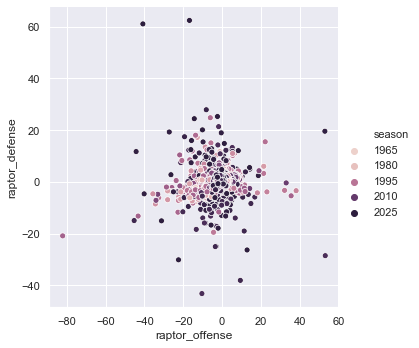

In [21]:
sns.set(style="darkgrid")
sns.relplot(x="raptor_offense", y="raptor_defense", data=df3, hue="season")

Creating a scatter plot with the x-axis being the season and the y-axis being player's defensive rating, so that we can see how defensive ratings have changed over time.

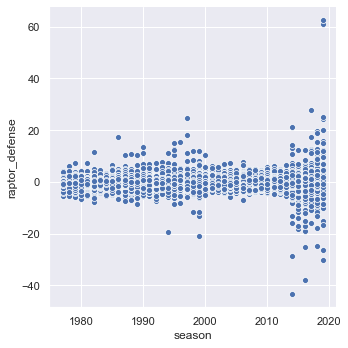

In [22]:
#sns.set(style="darkgrid")
sns.relplot(x="season", y="raptor_defense", data=df3)

Creating a scatter plot with the x-axis being the season and the y-axis being player's offensive rating, so that we can see how offensive ratings have changed over time.

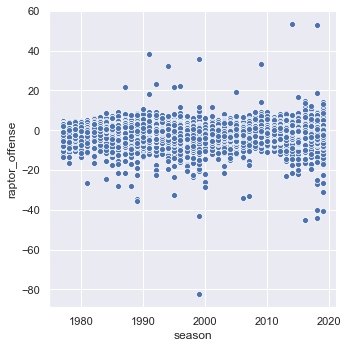

In [23]:
sns.relplot(x="season", y="raptor_offense", data=df3)

## Analysis

From our quartile range we can infer that the majority of players have an offensive rating below 0 meaning that they decreased the overall performance of their team's offense. The mean offensive rating for an NBA player is -1.27, meaning that the average NBA player decreased their team's offensive performace by 1.27 per 100 possessions. This is also true when it comes to defensive ratings where the mean defensive rating is -0.337, meaning that the average NBA player decreased their team's defensive performance by 0.337 per 100 possessions. 

Sorting players from worst to best by offensive rating, I separated the 10 worst offensive performers from the rest of the players and found the mean number of possessions to be 4.5 possessions per season with a mean offensive performance to be -43.24, meaning that the average player who is one of the 10 worst offensive players in the NBA, hurts his team's overall performance by 43.24 per 100 possessions, but only has 4.5 possessions per season.

Doing the same with defensive ratings, I found that the mean defensive performance of the 10 worst defenders was -27.57 with the mean possessions being 10.6.

However, if we switch it and instead find the mean offensive rating of the best 10 offensive players, we recieve a mean offensive rating of 33.38 with a mean number of possessions per season being 6.7. Meanwhile, the mean defensive rating of the best 10 defensive players was 30.64 with the mean number of possessions per season being 10.9.

From our combined plot of both offensive and defensive ratings we find that more recent players tend to vary a lot more significantly with a much larger range of ratings. In contrast, the players from previous years tend to be more condensed around 0 for both offensive and defensive ratings.

If we look at our plot of just defensive ratings, this becomes more clear. In more recent years, there has been a wide variation in player defensive ratings with two never-seen-before highs in just the last 5 years. Looking at the chart of just the offense, it becomes less clear but there still tends to be a much larger range in recent years.

## Summary

The first conclusion we can make is that the majority of players are not productive members on their team both offesnsively and defensively. This is most likely because players are compared to the better members of their team which exist as extremes. While it makes sense that the players who were the most counterproductive had the least possessions, what surprised me most was the fact that the players who were the most productive had a below average number of possessions: the mean number of possessions for all players was 2807 possessions per season while the mean number of possessions for the ten most productive players was 10.9 possessions per season. 

We also found that the majority of players tend towards zero productivity for their team, but the range of players productivity has greatly increased. This is greatest shown for the graph which, more visibly for the defensive rating, has very condensed data that all is right around 0, untill about 2014 when the range increases to have several extremes showing it as less condensed. I initially thought this increase in range was a result of the NBA adding three pointers to gameplay, however, this did not seem to have an effect given three-pointers were added in 1979 and we did not see a major change untill 2014. 

 In the future it would be interesting to compare this with data about how salaries and viewership for NBA players and teams to see if they had an affect or were affected. It would also be interesting to compare this with data about college athletes to see if this is across all of basketball or just in the NBA.

## Acknowledgements

Many thanks to Navya Mangipudi and Ms. Sconyers for their much appreciated help. Additional thanks to seaborn.pydata.com for help with my scatterplots. Additional thanks to Ms. Sconyers for providing me with code. Additional thanks to Scott for providing me with much needed emotional encouragement. Additional thanks to FiveThirtyEight for providing me with this data on Basketball. Additional thanks to active.com for information on when three-pointers were added to basketball.